## Gráfico de Barras

Outro tipo de gráfico bastante utilizado é o de barras.

Vamos coletar alguns dados da [Demanda por Vagas - Educação Infantil e EJA
Serie historica da demanda por vagas](http://dados.prefeitura.sp.gov.br/dataset/demanda-por-vagas-educacao-infantil-e-eja)

Primeiro, vamos importar o csv para um Data frame do Pandas.

In [17]:
import pandas as pd

df = pd.read_csv('evolucaodemanda.csv' , 
                 sep = ";", encoding = 'latin-1', header = 0)

Vamos supor que a série histórica de interesse é a referente ao distrito de Água Rasa. Vamos fazer um corte de nosso Data frame, para selecionar apenas as linhas referentes à Água Rasa:

In [18]:
aguaRasa = df.loc[df['DISTRITO'] == 'AGUA RASA']
aguaRasa = aguaRasa.reset_index(drop=True)

aguaRasa

,DISTRITO,MAT_CRECHE,MAT_PRE_ESCOLA,MAT_FUND_I,MAT_FUND_II,MAT_EJA_I,MAT_EJA_II,MAT_ENS_MED,MAT_ED_PROF,MAT_PROC_CRECHE,MAT_PROC_PRE_ESC,DEM_CRECHE,DEM_PRE,DEM_FUND_I,DEM_FUND_II,DEM_EJA_I,DEM_EJA_II,DEM_PREF_CRECHE,DEM_PREF_PRE,MES_ANO_REF
0,AGUA RASA,573.000,1.929,1.344,1.376,219.0,137.0,0.0,0,NaN,NaN,505.0,153.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-06
1,AGUA RASA,626.000,1.971,1.373,1.360,107.0,174.0,0.0,0,NaN,NaN,583.0,160.0,0.0,0.0,0.0,0.0,NaN,NaN,set-06
2,AGUA RASA,634.000,1.950,1.323,1.354,100.0,101.0,0.0,0,NaN,NaN,683.0,199.0,0.0,0.0,0.0,0.0,NaN,NaN,dez-06
3,AGUA RASA,654.000,1.868,1.377,1.434,59.0,194.0,0.0,0,NaN,NaN,523.0,250.0,0.0,0.0,0.0,0.0,NaN,NaN,mar-07
4,AGUA RASA,662.000,1.839,1.332,1.419,52.0,109.0,0.0,0,NaN,NaN,467.0,229.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-07
5,AGUA RASA,659.000,1.825,1.322,1.397,58.0,121.0,0.0,0,NaN,NaN,713.0,148.0,0.0,0.0,0.0,0.0,NaN,NaN,set-07
6,AGUA RASA,723.000,1.844,1.317,1.384,40.0,77.0,0.0,0,NaN,NaN,360.0,353.0,0.0,0.0,0.0,0.0,NaN,NaN,dez-07
7,AGUA RASA,722.000,1.428,1.248,1.414,78.0,182.0,0.0,0,NaN,NaN,192.0,125.0,0.0,0.0,0.0,0.0,NaN,NaN,mar-08
8,AGUA RASA,772.000,1.445,1.251,1.391,78.0,140.0,0.0,0,10.0,6.0,246.0,107.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-08
9,AGUA RASA,777.000,1.472,1.248,1.374,79.0,147.0,0.0,0,0.0,1.0,358.0,100.0,0.0,0.0,0.0,0.0,NaN,NaN,set-08


Vamos criar agora um gráfico de barras, mostrando as matrículas relativas a cada uma das categorias, no último período de que temos dados, dezembro de 2017:

In [19]:
aguaRasa2017 = aguaRasa.loc[46]
aguaRasa2017

DISTRITO            AGUA RASA
MAT_CRECHE               1045
MAT_PRE_ESCOLA            866
MAT_FUND_I               1047
MAT_FUND_II               745
MAT_EJA_I                  12
MAT_EJA_II                 78
MAT_ENS_MED                 0
MAT_ED_PROF                 0
MAT_PROC_CRECHE             0
MAT_PROC_PRE_ESC            0
DEM_CRECHE                102
DEM_PRE                     0
DEM_FUND_I                  0
DEM_FUND_II                 0
DEM_EJA_I                   0
DEM_EJA_II                  0
DEM_PREF_CRECHE           NaN
DEM_PREF_PRE              NaN
MES_ANO_REF            dez-17
Name: 46, dtype: object

Isso já está bem próximo do que desejamos, mas ainda há algumas linhas que não queremos que apareçam: as que têm zero, as que têm NaN([not a number](https://pt.wikipedia.org/wiki/NaN)) e as que têm DEM_, já que estamos avaliando apenas as matrículas.

In [20]:
aguaRasa2017 = aguaRasa2017[(aguaRasa2017!=0)].dropna().drop(['DEM_CRECHE'])

aguaRasa2017

DISTRITO          AGUA RASA
MAT_CRECHE             1045
MAT_PRE_ESCOLA          866
MAT_FUND_I             1047
MAT_FUND_II             745
MAT_EJA_I                12
MAT_EJA_II               78
MES_ANO_REF          dez-17
Name: 46, dtype: object

Pronto, agora nossa tabela conta apenas com valores válidos.

Vamos agora criar um gráfico a partir dessa tabela.

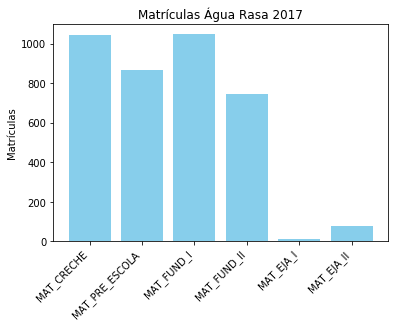

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Criar um vetor de indices
ind = np.arange(len(aguaRasa2017.index[1:-1]))
#Largura das barras
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind,height = aguaRasa2017.values[1:-1], color='SkyBlue')

ax.set_ylabel('Matrículas')
ax.set_title('Matrículas Água Rasa 2017')
ax.set_xticks(ind)
ax.set_xticklabels(aguaRasa2017.index[1:-1], rotation = 45, ha = 'right')
plt.savefig('Exemplos/Matrículas Água Rasa 2017.png', dpi = 300, bbox_inches='tight')



plt.show()


### Série histórica da Demanda

Agora que conseguimos visualizar a demanda em 2017, podemos criar um gráfico com a demanda total de Água Rasa ao longo dos anos.

Vamos primeiro visualizar novamente os dados que temos na variável Água Rasa:

In [22]:
aguaRasa


,DISTRITO,MAT_CRECHE,MAT_PRE_ESCOLA,MAT_FUND_I,MAT_FUND_II,MAT_EJA_I,MAT_EJA_II,MAT_ENS_MED,MAT_ED_PROF,MAT_PROC_CRECHE,MAT_PROC_PRE_ESC,DEM_CRECHE,DEM_PRE,DEM_FUND_I,DEM_FUND_II,DEM_EJA_I,DEM_EJA_II,DEM_PREF_CRECHE,DEM_PREF_PRE,MES_ANO_REF
0,AGUA RASA,573.000,1.929,1.344,1.376,219.0,137.0,0.0,0,NaN,NaN,505.0,153.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-06
1,AGUA RASA,626.000,1.971,1.373,1.360,107.0,174.0,0.0,0,NaN,NaN,583.0,160.0,0.0,0.0,0.0,0.0,NaN,NaN,set-06
2,AGUA RASA,634.000,1.950,1.323,1.354,100.0,101.0,0.0,0,NaN,NaN,683.0,199.0,0.0,0.0,0.0,0.0,NaN,NaN,dez-06
3,AGUA RASA,654.000,1.868,1.377,1.434,59.0,194.0,0.0,0,NaN,NaN,523.0,250.0,0.0,0.0,0.0,0.0,NaN,NaN,mar-07
4,AGUA RASA,662.000,1.839,1.332,1.419,52.0,109.0,0.0,0,NaN,NaN,467.0,229.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-07
5,AGUA RASA,659.000,1.825,1.322,1.397,58.0,121.0,0.0,0,NaN,NaN,713.0,148.0,0.0,0.0,0.0,0.0,NaN,NaN,set-07
6,AGUA RASA,723.000,1.844,1.317,1.384,40.0,77.0,0.0,0,NaN,NaN,360.0,353.0,0.0,0.0,0.0,0.0,NaN,NaN,dez-07
7,AGUA RASA,722.000,1.428,1.248,1.414,78.0,182.0,0.0,0,NaN,NaN,192.0,125.0,0.0,0.0,0.0,0.0,NaN,NaN,mar-08
8,AGUA RASA,772.000,1.445,1.251,1.391,78.0,140.0,0.0,0,10.0,6.0,246.0,107.0,0.0,0.0,0.0,0.0,NaN,NaN,jun-08
9,AGUA RASA,777.000,1.472,1.248,1.374,79.0,147.0,0.0,0,0.0,1.0,358.0,100.0,0.0,0.0,0.0,0.0,NaN,NaN,set-08


### Usando Regex

Na coluna "MES_ANO_REF", temos valores que misturam palavras e números, mais difíceis de trabalhar. Para isso, vamos usar str.replace junto com uma [expressão regular](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular) para remover todos os caracteres que não são números dessa coluna.

In [23]:
pat = '([a-zA-Z])*\-'
aguaRasa.MES_ANO_REF = aguaRasa.MES_ANO_REF.str.replace( pat, '' )
aguaRasa

,DISTRITO,MAT_CRECHE,MAT_PRE_ESCOLA,MAT_FUND_I,MAT_FUND_II,MAT_EJA_I,MAT_EJA_II,MAT_ENS_MED,MAT_ED_PROF,MAT_PROC_CRECHE,MAT_PROC_PRE_ESC,DEM_CRECHE,DEM_PRE,DEM_FUND_I,DEM_FUND_II,DEM_EJA_I,DEM_EJA_II,DEM_PREF_CRECHE,DEM_PREF_PRE,MES_ANO_REF
0,AGUA RASA,573.000,1.929,1.344,1.376,219.0,137.0,0.0,0,NaN,NaN,505.0,153.0,0.0,0.0,0.0,0.0,NaN,NaN,06
1,AGUA RASA,626.000,1.971,1.373,1.360,107.0,174.0,0.0,0,NaN,NaN,583.0,160.0,0.0,0.0,0.0,0.0,NaN,NaN,06
2,AGUA RASA,634.000,1.950,1.323,1.354,100.0,101.0,0.0,0,NaN,NaN,683.0,199.0,0.0,0.0,0.0,0.0,NaN,NaN,06
3,AGUA RASA,654.000,1.868,1.377,1.434,59.0,194.0,0.0,0,NaN,NaN,523.0,250.0,0.0,0.0,0.0,0.0,NaN,NaN,07
4,AGUA RASA,662.000,1.839,1.332,1.419,52.0,109.0,0.0,0,NaN,NaN,467.0,229.0,0.0,0.0,0.0,0.0,NaN,NaN,07
5,AGUA RASA,659.000,1.825,1.322,1.397,58.0,121.0,0.0,0,NaN,NaN,713.0,148.0,0.0,0.0,0.0,0.0,NaN,NaN,07
6,AGUA RASA,723.000,1.844,1.317,1.384,40.0,77.0,0.0,0,NaN,NaN,360.0,353.0,0.0,0.0,0.0,0.0,NaN,NaN,07
7,AGUA RASA,722.000,1.428,1.248,1.414,78.0,182.0,0.0,0,NaN,NaN,192.0,125.0,0.0,0.0,0.0,0.0,NaN,NaN,08
8,AGUA RASA,772.000,1.445,1.251,1.391,78.0,140.0,0.0,0,10.0,6.0,246.0,107.0,0.0,0.0,0.0,0.0,NaN,NaN,08
9,AGUA RASA,777.000,1.472,1.248,1.374,79.0,147.0,0.0,0,0.0,1.0,358.0,100.0,0.0,0.0,0.0,0.0,NaN,NaN,08


Vamos agora remover, com Regex, todas as colunas que começam com "MAT", já que vamos avaliar apenas a demanda.

In [24]:
pat = '(^MAT)\w+'
aguaRasa.drop(list(df.filter(regex = pat)), axis = 1, inplace = True)
aguaRasa

,DISTRITO,DEM_CRECHE,DEM_PRE,DEM_FUND_I,DEM_FUND_II,DEM_EJA_I,DEM_EJA_II,DEM_PREF_CRECHE,DEM_PREF_PRE,MES_ANO_REF
0,AGUA RASA,505.0,153.0,0.0,0.0,0.0,0.0,NaN,NaN,06
1,AGUA RASA,583.0,160.0,0.0,0.0,0.0,0.0,NaN,NaN,06
2,AGUA RASA,683.0,199.0,0.0,0.0,0.0,0.0,NaN,NaN,06
3,AGUA RASA,523.0,250.0,0.0,0.0,0.0,0.0,NaN,NaN,07
4,AGUA RASA,467.0,229.0,0.0,0.0,0.0,0.0,NaN,NaN,07
5,AGUA RASA,713.0,148.0,0.0,0.0,0.0,0.0,NaN,NaN,07
6,AGUA RASA,360.0,353.0,0.0,0.0,0.0,0.0,NaN,NaN,07
7,AGUA RASA,192.0,125.0,0.0,0.0,0.0,0.0,NaN,NaN,08
8,AGUA RASA,246.0,107.0,0.0,0.0,0.0,0.0,NaN,NaN,08
9,AGUA RASA,358.0,100.0,0.0,0.0,0.0,0.0,NaN,NaN,08


Estamos quase lá! Vamos agora agrupar os anos pela sua média e verificar como foi a média da demanda.

In [25]:
#Criar uma lista com todas as colunas contidas em AguaRasa, exceto MES_ANO_REF
col_list= list(aguaRasa)
col_list.remove('MES_ANO_REF')

#Criar uma nova coluna Demanda, que recebe a soma das demandas daquela linha
aguaRasa['Demanda'] = aguaRasa[col_list].sum(axis=1)

#Criar um novo dataframe apenas com as colunas MES_ANO_REF e Demanda 
aguaRasaAno = aguaRasa[['MES_ANO_REF','Demanda']]
#Renomear MES_ANO_REF para Ano
aguaRasaAno = aguaRasaAno.rename(index=str, columns={"MES_ANO_REF": "Ano"})

#Agrupar as linhas por ano e o valor da demanda ser a media daquele ano
aguaRasaAno = aguaRasaAno.groupby(['Ano']).mean()


aguaRasaAno

,Demanda
Ano,
06,761.00
07,760.75
08,342.00
09,289.25
10,448.25
11,533.50
12,457.75
13,375.75
14,311.75


Vamos criar gráficos, para facilitar a visualização dos dados que obtivemos:

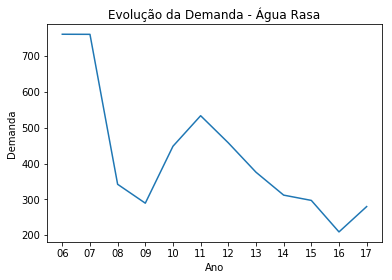

In [26]:
fig, ax = plt.subplots()

ax.set_ylabel('Demanda')
ax.set_xlabel('Ano')
ax.set_title('Evolução da Demanda - Água Rasa')
ax.plot(aguaRasaAno)


plt.savefig('Exemplos/Evolução da Demanda - Água Rasa 1', dpi = 300)

Modificando as [propriedadas da linha](https://matplotlib.org/1.4.1/users/pyplot_tutorial.html), podemos obter muitas variações deste mesmo gráfico: 

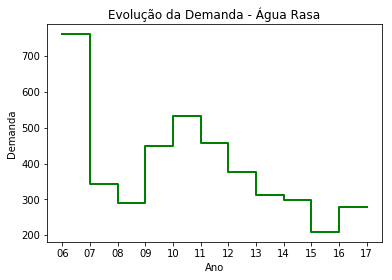

In [27]:
fig, ax = plt.subplots()

ax.set_ylabel('Demanda')
ax.set_xlabel('Ano')
ax.set_title('Evolução da Demanda - Água Rasa')
line, = ax.plot(aguaRasaAno)
plt.setp(line, color='g', linewidth=2.0, ls = 'steps')


plt.savefig('Exemplos/Evolução da Demanda - Água Rasa 2', dpi = 300)

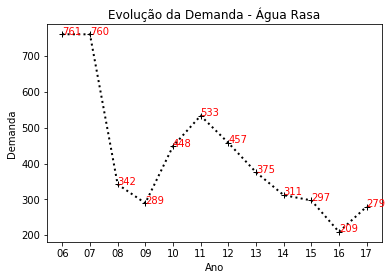

In [28]:
fig, ax = plt.subplots()

ax.set_ylabel('Demanda')
ax.set_xlabel('Ano')
ax.set_title('Evolução da Demanda - Água Rasa')
line, = ax.plot(aguaRasaAno)
plt.setp(line, color='black', linewidth=2.0, ls = ':', marker = '+')
for i,j in zip(aguaRasaAno.index.values,list(aguaRasaAno['Demanda'])):
    ax.annotate(str(int(j)),xy=(i, j), color = 'r')

plt.savefig('Exemplos/Evolução da Demanda - Água Rasa 3', dpi = 300)

### Mais um exemplo com Regex

No exemplo do gráfico de barras, utilizamos as informações contidas no csv para criar os nomes no eixo X. Mas os nomes não estão num formato muito agradável. Recuperando esse mesmo exemplo, podemos usar Regex para modificar os textos, a fim de ficarem mais agradáveis:

In [29]:
aguaRasa2017.index = aguaRasa2017.index.str.replace( "_", ' ' )
aguaRasa2017.index = aguaRasa2017.index.str.replace( "MAT", '' )
aguaRasa2017.index = aguaRasa2017.index.str.strip()



aguaRasa2017


DISTRITO       AGUA RASA
CRECHE              1045
PRE ESCOLA           866
FUND I              1047
FUND II              745
EJA I                 12
EJA II                78
MES ANO REF       dez-17
Name: 46, dtype: object

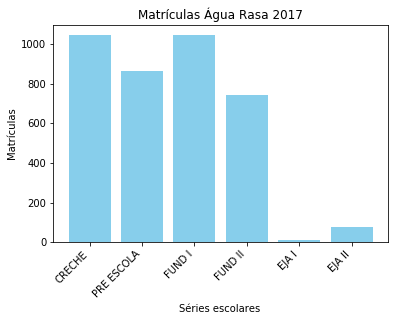

In [30]:


#Criar um vetor de indices
ind = np.arange(len(aguaRasa2017.index[1:-1]))
#Largura das barras
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind,height = aguaRasa2017.values[1:-1], color='SkyBlue')

ax.set_ylabel('Matrículas')
ax.set_xlabel('Séries escolares ')
ax.set_title('Matrículas Água Rasa 2017')
ax.set_xticks(ind)
ax.set_xticklabels(aguaRasa2017.index[1:-1], rotation = 45, ha = 'right')
plt.savefig('Exemplos/Matrículas Água Rasa 2017 - 2.png', dpi = 300, bbox_inches='tight')



plt.show()

## Exportar para CSV

Podemos exportar os data frames que modificamos para os formatos csv e xls. O data frame faz isso automaticamente para nós:

In [31]:
aguaRasa2017.to_excel('Exemplos/aguaRasa2017.xls')
aguaRasa2017.to_csv('Exemplos/aguaRasa2017.csv')